In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.datasets import cifar10
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import initializers

In [3]:
(X_train, y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

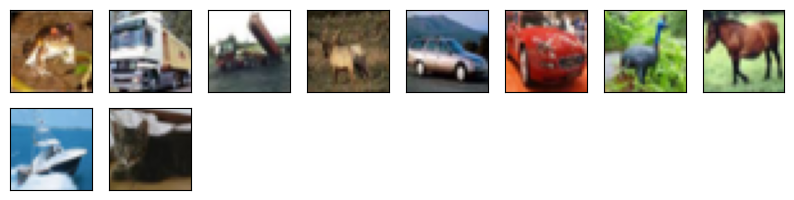

In [6]:
#code to show 10 images
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(8, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
plt.show()

In [7]:
#convert training labels to one hot vector
y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [8]:
#convert the training labels to float type and apply normalization
X_train=X_train/255.0
X_test=X_test/255.0
print(X_train.shape)
print(X_test.shape)
#plt.imshow(X_train[5])

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
def convolutional_model(input_shape):
  input_img=tf.keras.Input(shape=input_shape)
  Z1=tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='same')(input_img)
  B1=tf.keras.layers.BatchNormalization(axis=3)(Z1)
  A1=tf.keras.layers.ReLU()(B1)
  P1=tf.keras.layers.MaxPool2D()(A1)
  Z2=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(P1)
  B2=tf.keras.layers.BatchNormalization(axis=3)(Z2)
  A2=tf.keras.layers.ReLU()(B2)
  P2=tf.keras.layers.MaxPool2D()(A2)
  F=tf.keras.layers.Flatten()(P2)
  dense1 =tf.keras.layers.Dense(512, activation="relu")(F)
  outputs=tf.keras.layers.Dense(10,activation='softmax')(dense1)
  model=tf.keras.Model(inputs=input_img,outputs=outputs)
  return model



In [10]:
#hyperparameters
epochs=100
batch_size=32
conv_model=convolutional_model((32,32,3))
#learning rate scheduler
scheduler=tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.1,
    alpha=0.001,
    decay_steps=5000
)
#SGD
optimizer=tf.keras.optimizers.SGD(
    learning_rate=scheduler,
    momentum=0.0
)

conv_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
history=conv_model.fit(X_train, y_train,
                       batch_size=batch_size,
                       epochs=10,
                       validation_data=(X_test,y_test)
                       )

Epoch 1/10


I0000 00:00:1727546399.575529     105 service.cc:145] XLA service 0x79de68009710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727546399.575584     105 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  64/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1534 - loss: 7.4657 

I0000 00:00:1727546401.776497     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3557 - loss: 2.1821 - val_accuracy: 0.5542 - val_loss: 1.2856
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6156 - loss: 1.0848 - val_accuracy: 0.5973 - val_loss: 1.1755
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7151 - loss: 0.8073 - val_accuracy: 0.7046 - val_loss: 0.8495
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7547 - loss: 0.7071 - val_accuracy: 0.7071 - val_loss: 0.8466
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7596 - loss: 0.6965 - val_accuracy: 0.7071 - val_loss: 0.8463
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7537 - loss: 0.7058 - val_accuracy: 0.7066 - val_loss: 0.8464
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7563 - loss: 0.6999 - val_accuracy: 0.7068 - val_loss: 0.8460
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7540 - loss: 0.7022 - val_accurac

/tmp/ipykernel_37/3914248408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_37/3914248408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


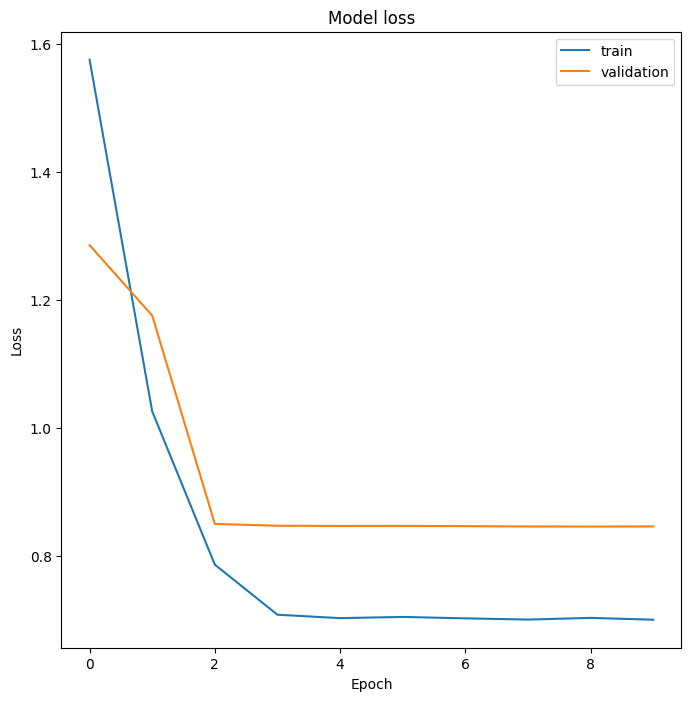

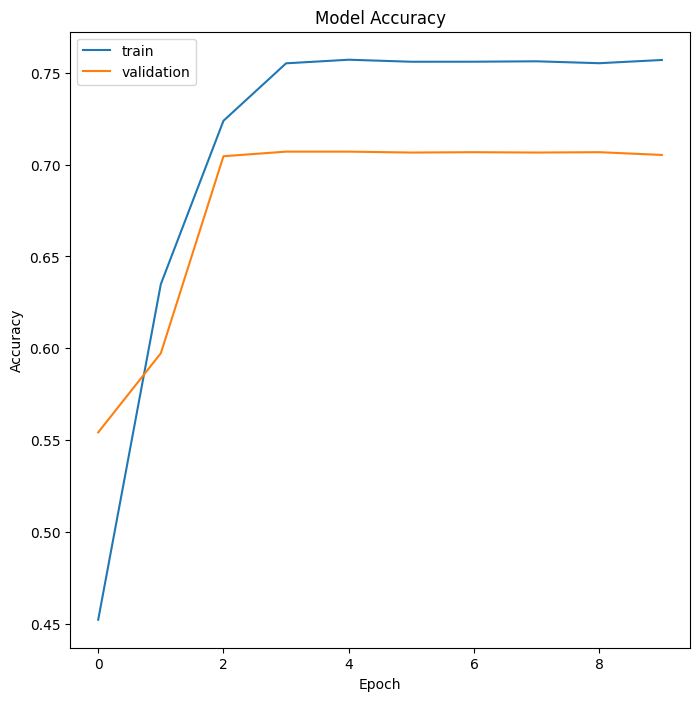

In [12]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(8,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(8,8)).set(xlabel='Epoch',ylabel='Accuracy')
plt.show()

In [12]:
loss, acc= conv_model.evaluate(X_test,y_test)
print("Accuracy on Test data:",acc)
print("Loss on Test Data:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7083 - loss: 0.8232
Accuracy on Test data: 0.7113999724388123
Loss on Test Data: 0.8317264914512634


In [13]:
!pip install opencv-python


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


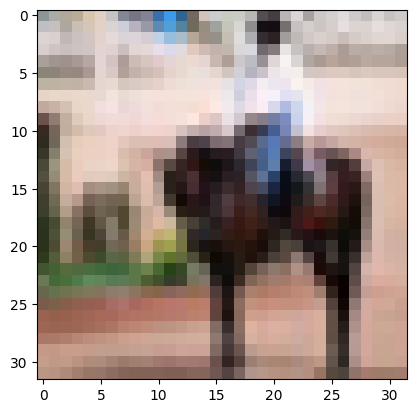

In [17]:
plt.imshow(X_train[11])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


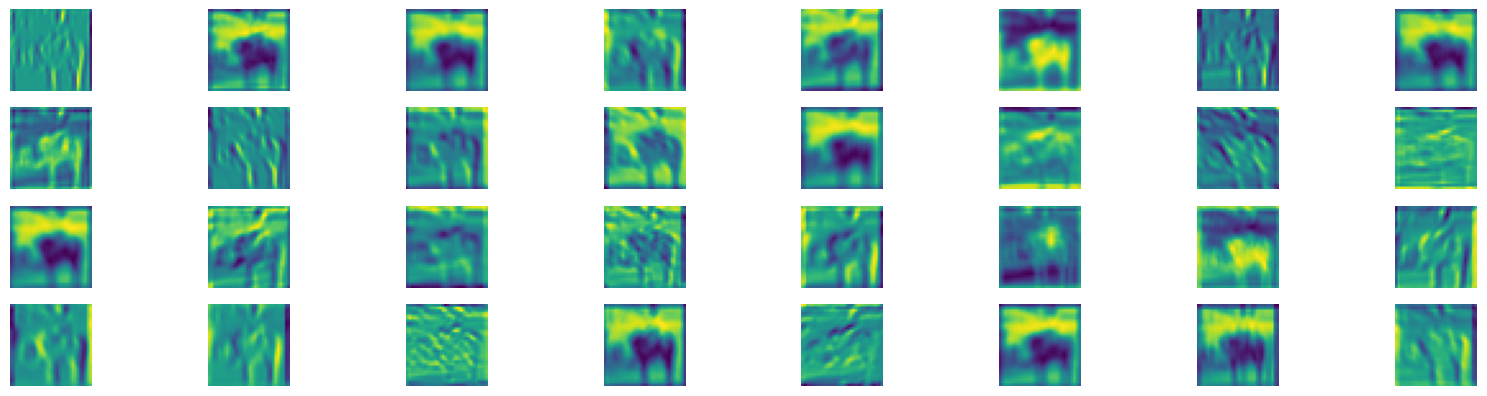

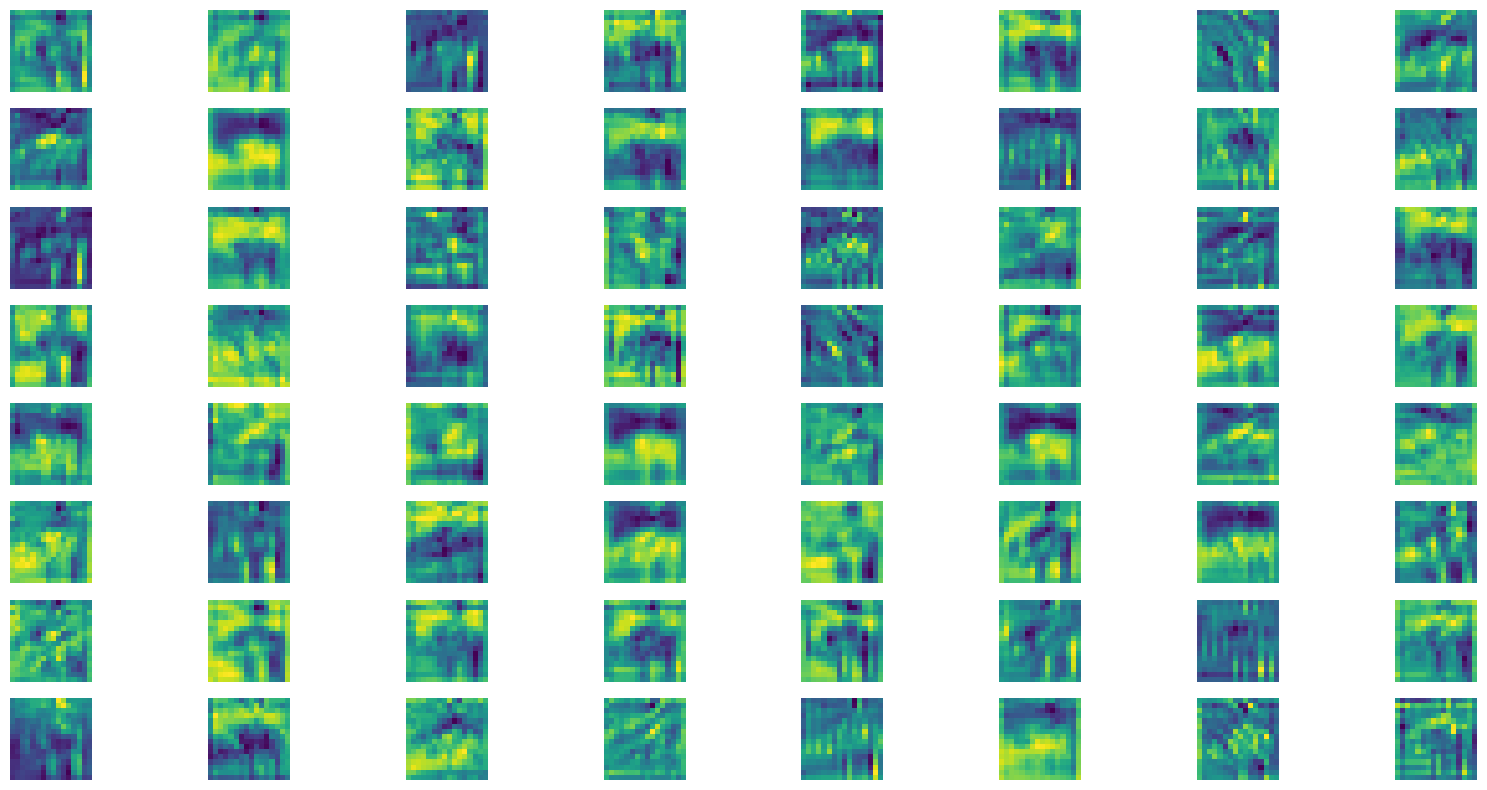

In [16]:
# Create a model that outputs the intermediate layers
layer_names = ['conv2d', 'conv2d_1']  # Names of the convolutional layers
intermediate_model = tf.keras.Model(inputs=conv_model.input, outputs=[conv_model.get_layer(name).output for name in layer_names])
input_image =np.expand_dims(X_train[11], axis=0)
activations = intermediate_model.predict(input_image)
def visualize_activations(activations):
    for layer_activations in activations:
        num_filters = layer_activations.shape[-1]
        plt.figure(figsize=(20, 10))
        for i in range(num_filters):
            ax = plt.subplot(8, 8, i + 1)  # Adjust grid size as needed
            plt.imshow(layer_activations[0, :, :, i], cmap='viridis')  # Show the filter activation
            plt.axis('off')
        plt.show()

# Visualize the activations
visualize_activations(activations)

In [2]:
import os
import cv2
path = '/kaggle/input/15-scene/15-Scene'

images = []
labels = []
for i in range(15):
    folder_name = f"{i:02d}"
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        print(f'Loading category: {folder_name}')
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, (224, 224))
                images.append(img)
                labels.append(i)


images = np.array(images)
labels = np.array(labels)

print("Loaded images shape:", images.shape)
print("Loaded labels shape:", labels.shape)

Loading category: 00
Loading category: 01
Loading category: 02
Loading category: 03
Loading category: 04
Loading category: 05
Loading category: 06
Loading category: 07
Loading category: 08
Loading category: 09
Loading category: 10
Loading category: 11
Loading category: 12
Loading category: 13
Loading category: 14
Loaded images shape: (4485, 224, 224, 3)
Loaded labels shape: (4485,)


In [3]:
num_samples=images.shape[0]
indices=np.arange(num_samples)
np.random.shuffle(indices)
X=images
y=labels
print(y.shape)
print(X.shape)

(4485,)
(4485, 224, 224, 3)


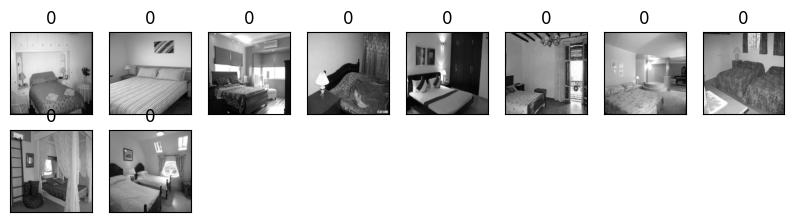

In [4]:
#code to show 10 images from the 15 scene dataset
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(8, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i])
  plt.title(y[i])
plt.show()

Text(0.5, 1.0, '8')

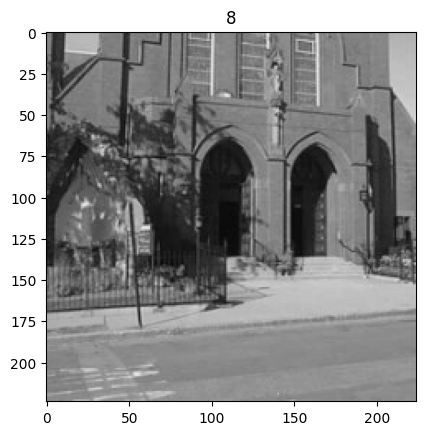

In [5]:
plt.imshow(images[2500])
plt.title(labels[2500])

In [6]:
#split the data into training and testing
x_train, x_test, y_train, y_test=train_test_split(images,labels, test_size=0.1,random_state=42,stratify=y)

In [7]:
print('X_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape',x_test.shape)
print('y_test shape', y_test.shape)

X_train shape (4036, 224, 224, 3)
y_train shape (4036,)
X_test shape (449, 224, 224, 3)
y_test shape (449,)


Text(0.5, 1.0, '14')

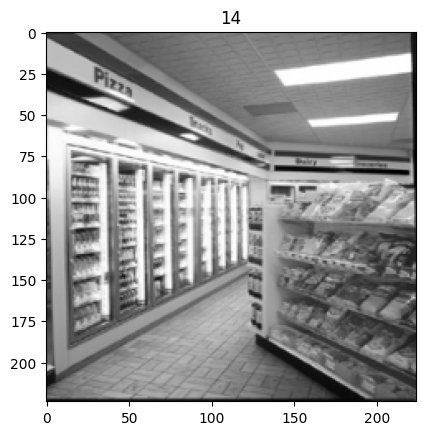

In [8]:
plt.imshow(x_train[1000])
plt.title(y_train[1000])

In [9]:
num_classes=15
y_trai=to_categorical(y_train,num_classes)
y_tes=to_categorical(y_test,num_classes)
print(y_trai.shape)
print(y_tes.shape)

(4036, 15)
(449, 15)


In [10]:
#validation data
X_val, _, y_val,_=train_test_split(x_train, y_trai, test_size=0.1, stratify=y_train,random_state=42)

In [11]:
print(X_val.shape)
print(y_val.shape)
X_val=X_val.astype('float')/255.0
y_val=to_categorical(y_val,15)

(3632, 224, 224, 3)
(3632, 15)


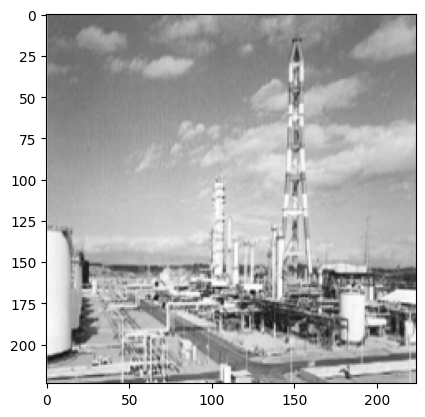

In [12]:
plt.imshow(X_val[8])

In [18]:
x_train=x_train/255.0
x_test=x_test/255.0
print(x_train.shape)
print(x_test.shape)

(4036, 224, 224, 3)
(449, 224, 224, 3)


In [14]:
def scene15_model(input_shape,dropout_rate=0.5):
  input_img=tf.keras.Input(shape=input_shape)
  Z1=tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='same',kernel_initializer='he_normal')(input_img)
  B1=tf.keras.layers.BatchNormalization(axis=3)(Z1)
  A1=tf.keras.layers.ReLU()(B1)
  P1=tf.keras.layers.MaxPool2D()(A1)
  Z2=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal')(P1)
  B2=tf.keras.layers.BatchNormalization(axis=3)(Z2)
  A2=tf.keras.layers.ReLU()(B2)
  P2=tf.keras.layers.MaxPool2D()(A2)
  Z3=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal')(P2)
  B3=tf.keras.layers.BatchNormalization(axis=3)(Z3)
  A3=tf.keras.layers.ReLU()(B3)
  P3=tf.keras.layers.MaxPool2D()(A3)
  F=tf.keras.layers.Flatten()(P3)
  dense1 =tf.keras.layers.Dense(600, activation="relu",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros())(F)
  dropout1 = tf.keras.layers.Dropout(dropout_rate)(dense1)
  outputs=tf.keras.layers.Dense(15,activation='softmax')(dropout1)
  model=tf.keras.Model(inputs=input_img,outputs=outputs)
  return model

In [15]:
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
train_gen=datagen.flow(x_train,y_trai,batch_size=20)

In [16]:
#hyperparameters
epochs=100
batch_size=32
model1=scene15_model((224,224,3),dropout_rate=0.5)
#adding callbacaks for early stopping
callback=tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=10

)
#learning rate scheduler
scheduler=tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.01,
    alpha=0.1,
    decay_steps=500
)
#SGD
optimizer1=tf.keras.optimizers.SGD(
    learning_rate=scheduler,
    momentum=0.0
)
#RMSprop
optimizer2=tf.keras.optimizers.RMSprop(
    learning_rate=scheduler,
    momentum=0.0,
    epsilon=1e-07
)
#Adam
optimizer3=tf.keras.optimizers.Adam(
    learning_rate=scheduler,
    epsilon=1e-07,
)
model1.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_gen,
                       epochs=100,
                       validation_data=(x_test,y_tes)
                    
                       )

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 227ms/step - accuracy: 0.5296 - loss: 1.3907 - val_accuracy: 0.3474 - val_loss: 2.3697
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 224ms/step - accuracy: 0.5528 - loss: 1.3506 - val_accuracy: 0.4744 - val_loss: 1.9954
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 224ms/step - accuracy: 0.5417 - loss: 1.3680 - val_accuracy: 0.6437 - val_loss: 1.0446
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 224ms/step - accuracy: 0.5404 - loss: 1.3974 - val_accuracy: 0.4655 - val_loss: 2.0326
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 224ms/step - accuracy: 0.5313 - loss: 1.3766 - val_accuracy: 0.6281 - val_loss: 1.0607
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 46s 222ms/step - accuracy: 0.5398 - loss: 1.3871 - val_accuracy: 0.4811 - val_loss: 1.9900
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 46s 222ms/step - accuracy: 0.5268 - loss: 1.4031 - val_accuracy: 0.5880 - val_loss: 1.2540
Epoch 8/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 46s 222ms/step - accuracy: 0.5350 -

In [1]:
df_loss_acc = pd.DataFrame(history1.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(8,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(8,8)).set(xlabel='Epoch',ylabel='Accuracy')
plt.show()

NameError: name 'pd' is not defined

In [25]:
loss, acc= model1.evaluate(x_test,y_tes)
print("Accuracy on Test data:",acc)
print("Loss on Test Data:", loss)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6707 - loss: 1.0230
Accuracy on Test data: 0.6636971235275269
Loss on Test Data: 1.0155601501464844
